3090 - pth-gpu, kernel died

3090 - pth25gpu - OK

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


c:\Users\m.amintoosi\.conda\envs\pth25gpu\lib\site-packages\torch\utils\data\dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
D:\git\mamintoosi-papers-codes\SR-Adam\main.py:310: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Training with SGD optimizer


Epoch 1/15:   0%|          | 0/98 [00:00<?, ?it/s]D:\git\mamintoosi-papers-codes\SR-Adam\main.py:335: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/15: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 
D:\git\mamintoosi-papers-codes\SR-Adam\main.py:362: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/15 | Train Loss: 2.2639 | Train Acc: 16.47% | Test Loss: 2.2015 | Test Acc: 22.74% | Time: 114.98s


Epoch 2/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 2/15 | Train Loss: 2.1349 | Train Acc: 23.83% | Test Loss: 2.0400 | Test Acc: 27.96% | Time: 112.90s


Epoch 3/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 3/15 | Train Loss: 2.0168 | Train Acc: 27.65% | Test Loss: 1.9419 | Test Acc: 31.59% | Time: 112.28s


Epoch 4/15: 100%|██████████| 98/98 [01:01<00:00,  1.58it/s] 


Epoch 4/15 | Train Loss: 1.9497 | Train Acc: 29.53% | Test Loss: 1.8938 | Test Acc: 32.61% | Time: 115.06s


Epoch 5/15: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 5/15 | Train Loss: 1.8958 | Train Acc: 31.94% | Test Loss: 1.8444 | Test Acc: 34.74% | Time: 117.84s


Epoch 6/15: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 6/15 | Train Loss: 1.8515 | Train Acc: 33.65% | Test Loss: 1.8249 | Test Acc: 34.86% | Time: 116.11s


Epoch 7/15: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 7/15 | Train Loss: 1.8040 | Train Acc: 35.23% | Test Loss: 1.7660 | Test Acc: 36.33% | Time: 115.28s


Epoch 8/15: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 8/15 | Train Loss: 1.7601 | Train Acc: 36.71% | Test Loss: 1.7414 | Test Acc: 36.98% | Time: 116.62s


Epoch 9/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 9/15 | Train Loss: 1.7228 | Train Acc: 38.06% | Test Loss: 1.6709 | Test Acc: 39.82% | Time: 115.56s


Epoch 10/15: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 10/15 | Train Loss: 1.6928 | Train Acc: 39.17% | Test Loss: 1.6497 | Test Acc: 40.55% | Time: 112.90s


Epoch 11/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 11/15 | Train Loss: 1.6581 | Train Acc: 39.91% | Test Loss: 1.6147 | Test Acc: 42.05% | Time: 115.62s


Epoch 12/15: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 12/15 | Train Loss: 1.6289 | Train Acc: 41.31% | Test Loss: 1.5848 | Test Acc: 42.54% | Time: 115.40s


Epoch 13/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 13/15 | Train Loss: 1.6097 | Train Acc: 41.86% | Test Loss: 1.5247 | Test Acc: 44.93% | Time: 113.88s


Epoch 14/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 14/15 | Train Loss: 1.5916 | Train Acc: 42.28% | Test Loss: 1.4918 | Test Acc: 46.83% | Time: 114.25s


Epoch 15/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 15/15 | Train Loss: 1.5681 | Train Acc: 43.38% | Test Loss: 1.4884 | Test Acc: 46.89% | Time: 115.02s

Training with Momentum optimizer


Epoch 1/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 1/15 | Train Loss: 2.0195 | Train Acc: 26.66% | Test Loss: 1.7616 | Test Acc: 36.21% | Time: 112.02s


Epoch 2/15: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 2/15 | Train Loss: 1.6839 | Train Acc: 39.07% | Test Loss: 1.4968 | Test Acc: 45.58% | Time: 117.67s


Epoch 3/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 3/15 | Train Loss: 1.5306 | Train Acc: 44.44% | Test Loss: 1.3879 | Test Acc: 50.55% | Time: 114.46s


Epoch 4/15: 100%|██████████| 98/98 [01:03<00:00,  1.56it/s] 


Epoch 4/15 | Train Loss: 1.4411 | Train Acc: 47.39% | Test Loss: 1.2960 | Test Acc: 54.04% | Time: 113.74s


Epoch 5/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 5/15 | Train Loss: 1.3718 | Train Acc: 50.57% | Test Loss: 1.2571 | Test Acc: 55.68% | Time: 114.41s


Epoch 6/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 6/15 | Train Loss: 1.3173 | Train Acc: 52.60% | Test Loss: 1.1666 | Test Acc: 59.63% | Time: 114.92s


Epoch 7/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 7/15 | Train Loss: 1.2598 | Train Acc: 54.95% | Test Loss: 1.1195 | Test Acc: 61.69% | Time: 113.40s


Epoch 8/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 8/15 | Train Loss: 1.2098 | Train Acc: 56.85% | Test Loss: 1.0894 | Test Acc: 62.07% | Time: 115.22s


Epoch 9/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 9/15 | Train Loss: 1.1670 | Train Acc: 58.41% | Test Loss: 1.0491 | Test Acc: 64.21% | Time: 114.35s


Epoch 10/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 10/15 | Train Loss: 1.1324 | Train Acc: 59.84% | Test Loss: 1.0163 | Test Acc: 64.93% | Time: 115.08s


Epoch 11/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 11/15 | Train Loss: 1.1043 | Train Acc: 60.95% | Test Loss: 1.0029 | Test Acc: 65.19% | Time: 114.56s


Epoch 12/15: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 12/15 | Train Loss: 1.0722 | Train Acc: 61.78% | Test Loss: 0.9765 | Test Acc: 66.23% | Time: 115.16s


Epoch 13/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 13/15 | Train Loss: 1.0504 | Train Acc: 62.71% | Test Loss: 0.9210 | Test Acc: 68.27% | Time: 114.35s


Epoch 14/15: 100%|██████████| 98/98 [01:01<00:00,  1.58it/s] 


Epoch 14/15 | Train Loss: 1.0223 | Train Acc: 63.73% | Test Loss: 0.9035 | Test Acc: 68.93% | Time: 112.80s


Epoch 15/15: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 15/15 | Train Loss: 1.0156 | Train Acc: 63.95% | Test Loss: 0.8995 | Test Acc: 69.36% | Time: 115.32s

Training with Adam optimizer


Epoch 1/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 1/15 | Train Loss: 1.7851 | Train Acc: 34.92% | Test Loss: 1.4221 | Test Acc: 49.11% | Time: 114.10s


Epoch 2/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/15 | Train Loss: 1.4615 | Train Acc: 47.14% | Test Loss: 1.2661 | Test Acc: 54.60% | Time: 114.01s


Epoch 3/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 3/15 | Train Loss: 1.3428 | Train Acc: 51.76% | Test Loss: 1.1608 | Test Acc: 58.99% | Time: 115.16s


Epoch 4/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 4/15 | Train Loss: 1.2591 | Train Acc: 55.05% | Test Loss: 1.1112 | Test Acc: 60.42% | Time: 115.65s


Epoch 5/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 5/15 | Train Loss: 1.1797 | Train Acc: 57.66% | Test Loss: 1.0277 | Test Acc: 64.00% | Time: 114.13s


Epoch 6/15: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 6/15 | Train Loss: 1.1347 | Train Acc: 59.83% | Test Loss: 0.9868 | Test Acc: 66.08% | Time: 115.70s


Epoch 7/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 7/15 | Train Loss: 1.0882 | Train Acc: 61.53% | Test Loss: 0.9703 | Test Acc: 66.10% | Time: 114.10s


Epoch 8/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 8/15 | Train Loss: 1.0552 | Train Acc: 62.43% | Test Loss: 0.9068 | Test Acc: 68.52% | Time: 114.62s


Epoch 9/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 9/15 | Train Loss: 1.0249 | Train Acc: 63.72% | Test Loss: 0.8769 | Test Acc: 69.93% | Time: 115.82s


Epoch 10/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 10/15 | Train Loss: 1.0049 | Train Acc: 64.30% | Test Loss: 0.8605 | Test Acc: 70.13% | Time: 113.40s


Epoch 11/15: 100%|██████████| 98/98 [01:02<00:00,  1.58it/s] 


Epoch 11/15 | Train Loss: 0.9774 | Train Acc: 65.27% | Test Loss: 0.8534 | Test Acc: 69.97% | Time: 112.53s


Epoch 12/15: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 12/15 | Train Loss: 0.9549 | Train Acc: 66.17% | Test Loss: 0.8284 | Test Acc: 71.48% | Time: 116.19s


Epoch 13/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 13/15 | Train Loss: 0.9402 | Train Acc: 66.74% | Test Loss: 0.8345 | Test Acc: 71.25% | Time: 113.94s


Epoch 14/15: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 14/15 | Train Loss: 0.9254 | Train Acc: 67.39% | Test Loss: 0.7954 | Test Acc: 72.47% | Time: 115.42s


Epoch 15/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 15/15 | Train Loss: 0.9072 | Train Acc: 67.97% | Test Loss: 0.7919 | Test Acc: 72.56% | Time: 114.29s

Training with SR-Adam (Fixed) optimizer


Epoch 1/15: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 1/15 | Train Loss: 1.7206 | Train Acc: 37.06% | Test Loss: 1.3676 | Test Acc: 50.50% | Time: 114.54s


Epoch 2/15: 100%|██████████| 98/98 [01:02<00:00,  1.58it/s] 


Epoch 2/15 | Train Loss: 1.4015 | Train Acc: 49.30% | Test Loss: 1.2562 | Test Acc: 53.52% | Time: 111.75s


Epoch 3/15: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s] 


Epoch 3/15 | Train Loss: 1.2880 | Train Acc: 53.52% | Test Loss: 1.1125 | Test Acc: 60.95% | Time: 118.15s


Epoch 4/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 4/15 | Train Loss: 1.1925 | Train Acc: 57.15% | Test Loss: 1.0488 | Test Acc: 63.41% | Time: 114.13s


Epoch 5/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 5/15 | Train Loss: 1.1262 | Train Acc: 59.75% | Test Loss: 0.9803 | Test Acc: 65.53% | Time: 114.83s


Epoch 6/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 6/15 | Train Loss: 1.0858 | Train Acc: 61.35% | Test Loss: 0.9281 | Test Acc: 67.54% | Time: 114.42s


Epoch 7/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 7/15 | Train Loss: 1.0441 | Train Acc: 63.04% | Test Loss: 0.9178 | Test Acc: 68.13% | Time: 114.86s


Epoch 8/15: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 8/15 | Train Loss: 1.0093 | Train Acc: 64.25% | Test Loss: 0.8912 | Test Acc: 69.37% | Time: 112.31s


Epoch 9/15: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 9/15 | Train Loss: 0.9924 | Train Acc: 65.07% | Test Loss: 0.8638 | Test Acc: 69.81% | Time: 116.86s


Epoch 10/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 10/15 | Train Loss: 0.9628 | Train Acc: 66.18% | Test Loss: 0.8469 | Test Acc: 70.20% | Time: 115.65s


Epoch 11/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 11/15 | Train Loss: 0.9408 | Train Acc: 66.83% | Test Loss: 0.8427 | Test Acc: 70.28% | Time: 114.62s


Epoch 12/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 12/15 | Train Loss: 0.9187 | Train Acc: 67.68% | Test Loss: 0.8129 | Test Acc: 72.03% | Time: 114.40s


Epoch 13/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 13/15 | Train Loss: 0.9030 | Train Acc: 67.99% | Test Loss: 0.7909 | Test Acc: 72.42% | Time: 114.23s


Epoch 14/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 14/15 | Train Loss: 0.8906 | Train Acc: 68.78% | Test Loss: 0.7722 | Test Acc: 73.36% | Time: 112.46s


Epoch 15/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 15/15 | Train Loss: 0.8695 | Train Acc: 69.47% | Test Loss: 0.7799 | Test Acc: 73.03% | Time: 115.51s

Training with SR-Adam (Dynamic) optimizer


Epoch 1/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 1/15 | Train Loss: 1.7945 | Train Acc: 34.65% | Test Loss: 1.4369 | Test Acc: 49.09% | Time: 114.09s


Epoch 2/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/15 | Train Loss: 1.4508 | Train Acc: 47.71% | Test Loss: 1.2483 | Test Acc: 55.74% | Time: 114.25s


Epoch 3/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 3/15 | Train Loss: 1.3126 | Train Acc: 52.89% | Test Loss: 1.1320 | Test Acc: 60.08% | Time: 114.43s


Epoch 4/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 4/15 | Train Loss: 1.2236 | Train Acc: 56.40% | Test Loss: 1.0585 | Test Acc: 62.53% | Time: 114.67s


Epoch 5/15: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 5/15 | Train Loss: 1.1612 | Train Acc: 58.81% | Test Loss: 0.9964 | Test Acc: 64.42% | Time: 112.64s


Epoch 6/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 6/15 | Train Loss: 1.1047 | Train Acc: 60.62% | Test Loss: 0.9513 | Test Acc: 66.83% | Time: 114.62s


Epoch 7/15: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 7/15 | Train Loss: 1.0660 | Train Acc: 62.02% | Test Loss: 0.9347 | Test Acc: 67.49% | Time: 114.84s


Epoch 8/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 8/15 | Train Loss: 1.0284 | Train Acc: 63.53% | Test Loss: 0.9094 | Test Acc: 67.84% | Time: 114.52s


Epoch 9/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 9/15 | Train Loss: 1.0110 | Train Acc: 64.41% | Test Loss: 0.8950 | Test Acc: 68.51% | Time: 115.52s


Epoch 10/15: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 10/15 | Train Loss: 0.9844 | Train Acc: 65.06% | Test Loss: 0.8684 | Test Acc: 69.82% | Time: 115.19s


Epoch 11/15: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 11/15 | Train Loss: 0.9498 | Train Acc: 66.54% | Test Loss: 0.8461 | Test Acc: 70.16% | Time: 113.04s


Epoch 12/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 12/15 | Train Loss: 0.9398 | Train Acc: 67.02% | Test Loss: 0.8159 | Test Acc: 71.67% | Time: 112.90s


Epoch 13/15: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 13/15 | Train Loss: 0.9139 | Train Acc: 67.84% | Test Loss: 0.7861 | Test Acc: 72.93% | Time: 112.71s


Epoch 14/15: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 14/15 | Train Loss: 0.8974 | Train Acc: 68.30% | Test Loss: 0.7859 | Test Acc: 72.59% | Time: 116.26s


Epoch 15/15: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 15/15 | Train Loss: 0.8837 | Train Acc: 69.05% | Test Loss: 0.7771 | Test Acc: 73.35% | Time: 114.72s


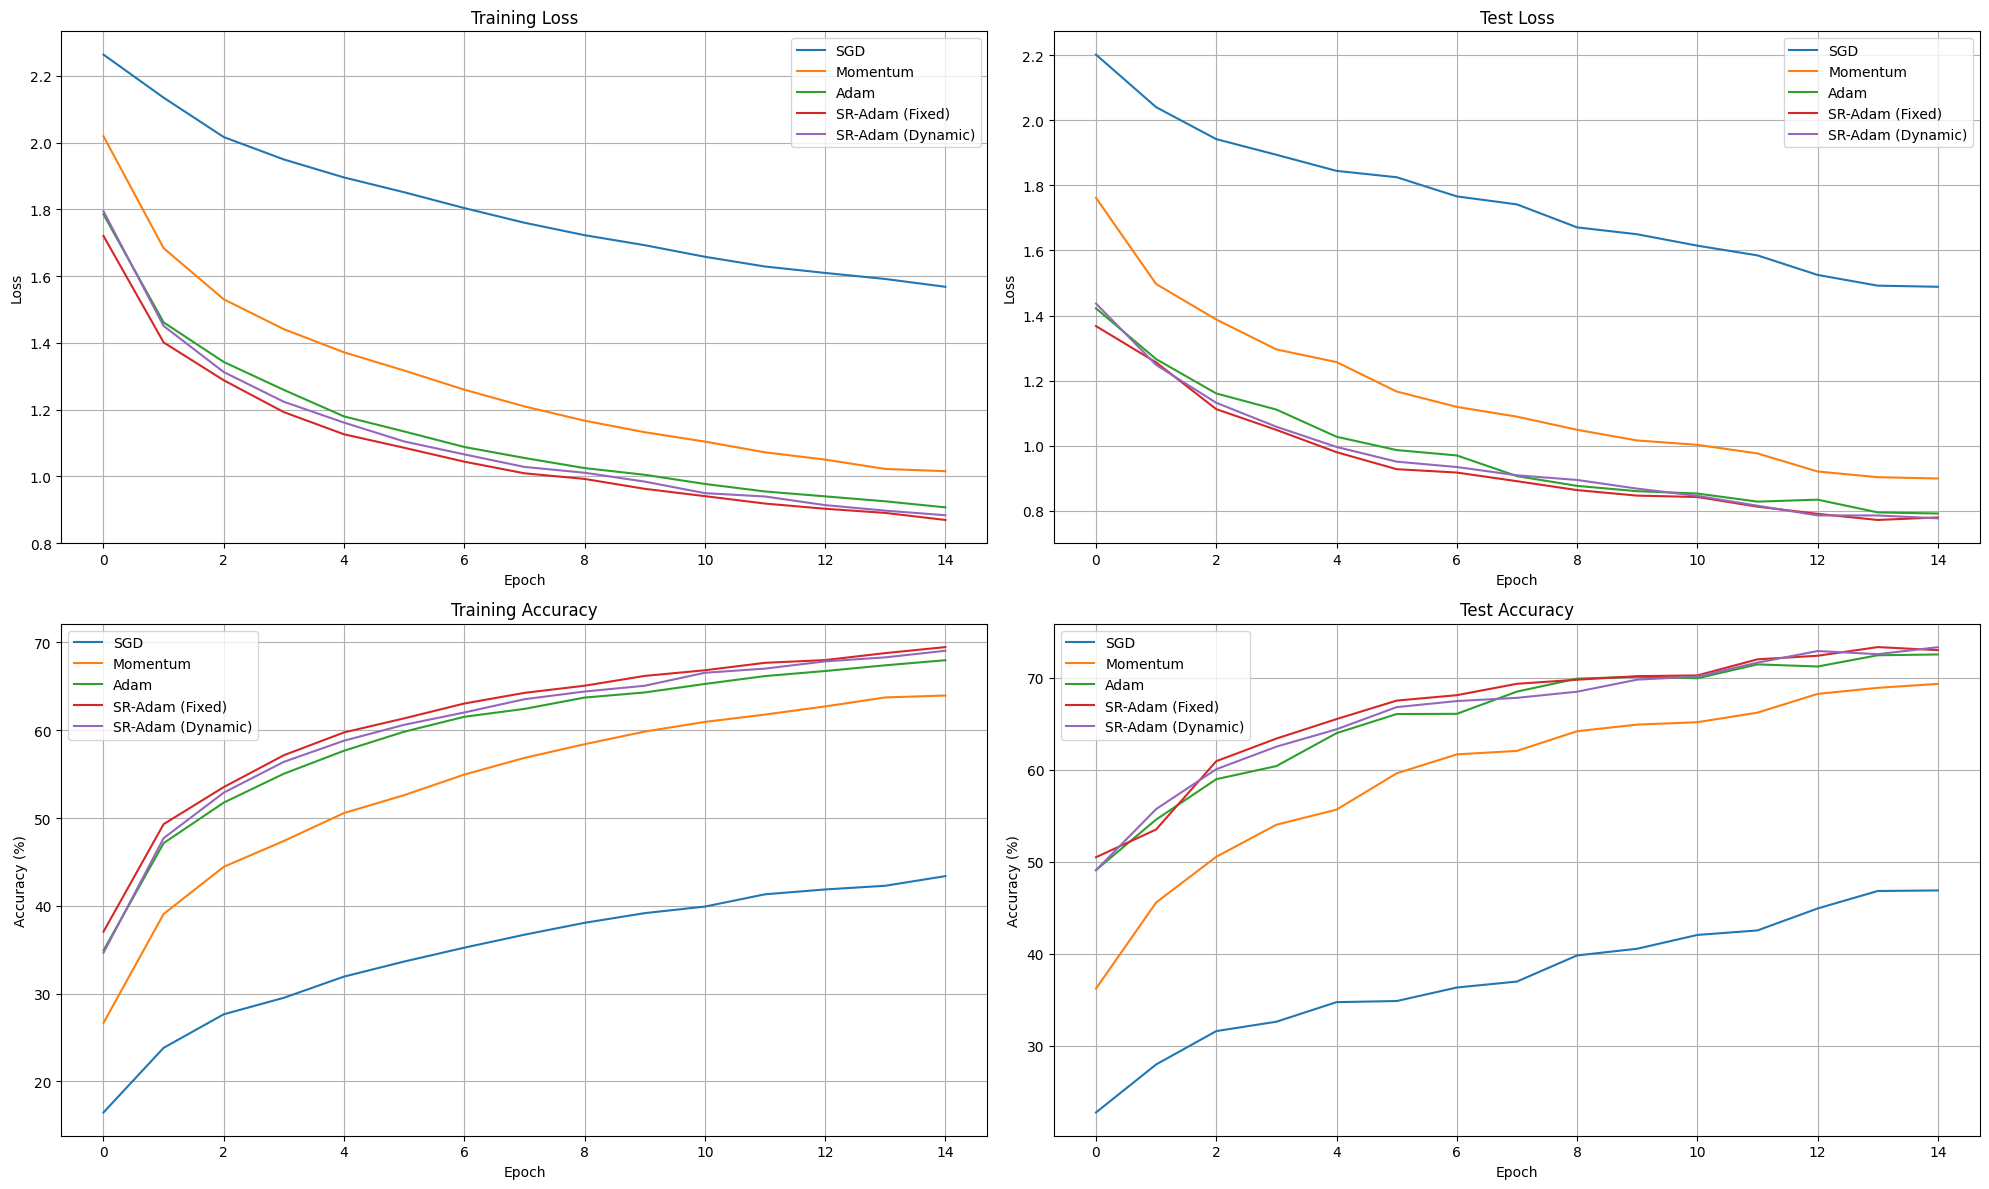

Results saved to results\optimizer_comparison_batch512_epochs15.xlsx and results\config.json

FINAL TEST ACCURACIES
SGD: 46.89%
Momentum: 69.36%
Adam: 72.56%
SR-Adam (Fixed): 73.03%
SR-Adam (Dynamic): 73.35%


In [1]:
%run main.py